<a href="https://colab.research.google.com/github/aniusoro/Uni/blob/main/Homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

Y = 5.37 + 0.01(Temp) + 0.05(Income). This means that for each one unit increase in Temperture is associated with a  0.01 unit decrease in the "quality of life" but a one unit increase in income is associated with a 0.05 unit increase in "quality of life" (which is the dependent variable beign measured). 

Question 2:

With a mean temperature of 55 degrees and a median income of $12,000. The formula is thus:
Y = 5.37 - 0.01(55) + 0.05(12000)
Hence the Quality of life score is 605.92

In [1]:
Y = 5.37 - (0.01 * 55) + (0.05 * 12000)
Y

[1] 604.82

Question 3:

In [2]:
marketingdata = read.csv("DataDrivenMarketing.csv")

In [3]:
sum(is.na(marketingdata$TV))
sum(is.na(marketingdata$Radio))
sum(is.na(marketingdata$Social.Media))
sum(is.na(marketingdata$Influencer))
sum(is.na(marketingdata$Sales))

[1] 0

[1] 8

[1] 7

[1] 5

[1] 5

The number of NA Values in each column are:
TV = 0
Radio = 8
Social.Media = 7
Influencer = 5
Sales = 5

Question 4:

In [4]:

library(tidyr)
newdata = marketingdata %>%drop_na(Radio, Social.Media, Influencer, Sales)
nrow(newdata)

[1] 4524

Question 5:

In [5]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Loading required package: ggplot2



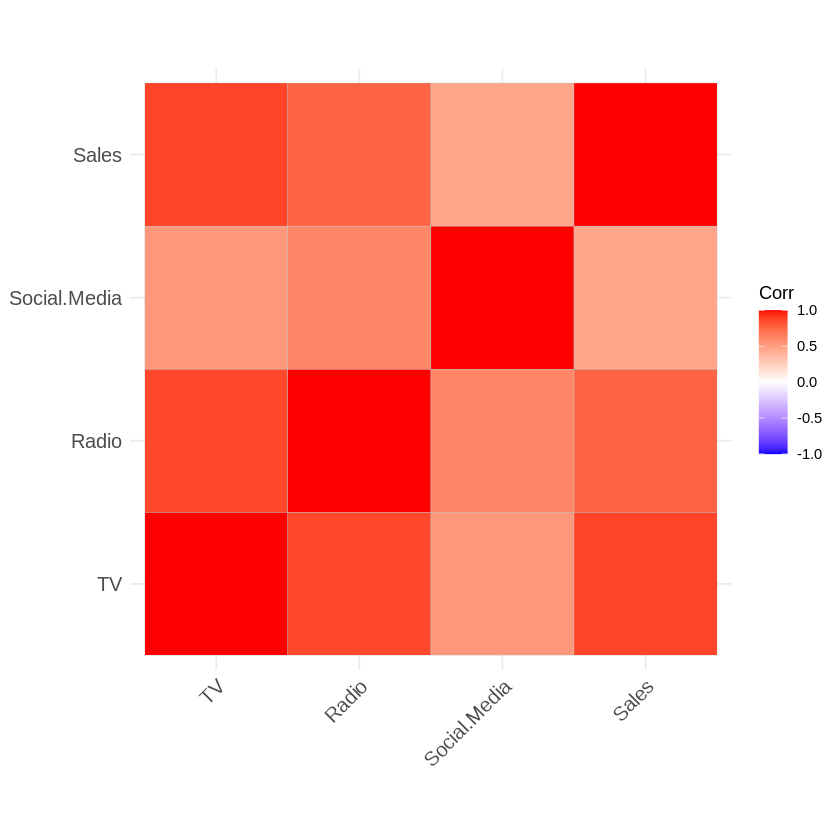

In [6]:
cor_matrix = cor(newdata[, c(1,2,3,5)])
ggcorrplot(cor_matrix)

Question 6:

In [7]:
mod1 = lm(formula = Sales ~ TV + Radio + Social.Media, data = newdata )
mod2 = lm(formula = Sales ~ TV + Social.Media, data = newdata)

In [8]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [9]:
library(car)
vif(mod1)
vif(mod2)

Loading required package: carData



TV        Radio Social.Media 
    4.082129     4.656350     1.578171

TV Social.Media 
    1.383548     1.383548

Question 7:

In [10]:
# Searching for outliers using the MAD-median outlier detection rule
TV = newdata$TV
SocialMedia = newdata$Social.Media
newdata$TVoutliers = abs(TV - median(TV)) / mad(TV) > 2.24
outliers_TV = subset(newdata, TVoutliers == TRUE)
nrow(outliers_TV)

newdata$Socialmediaoutliers = abs(SocialMedia - median(SocialMedia)) / mad(SocialMedia) > 2.24
outliers_SM = subset(newdata, Socialmediaoutliers == TRUE)
nrow(outliers_SM)

[1] 0

[1] 80

There are 0 outliers in the TV column but 80 in the Social.Media column of the newdata.

Question 8:

In [11]:
newdatacln2 = subset(newdata, TVoutliers == FALSE & Socialmediaoutliers == FALSE)
TVoutmodel = lm(Sales ~ TV, data = newdatacln2)
TVoutmodel


Call:
lm(formula = Sales ~ TV, data = newdatacln2)

Coefficients:
(Intercept)           TV  
    192.253        3.544  


In [12]:
TVoutmodelsum = summary(TVoutmodel)
TVoutmodelsum


Call:
lm(formula = Sales ~ TV, data = newdatacln2)

Residuals:
     Min       1Q   Median       3Q      Max 
-190.905  -33.707    0.625   32.789  178.684 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 192.25269    1.71285   112.2   <2e-16 ***
TV            3.54427    0.02882   123.0   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.8 on 4442 degrees of freedom
Multiple R-squared:  0.773,	Adjusted R-squared:  0.7729 
F-statistic: 1.512e+04 on 1 and 4442 DF,  p-value: < 2.2e-16


The models formula is Sales = 192.253 + 3.544(TV), and an R squared value of 0.773



Question 9:

In [13]:
newdatacln2 = subset(newdata, TVoutliers == FALSE & Socialmediaoutliers == FALSE)
SMoutmodel = lm(Sales ~ TV + Social.Media, data = newdatacln2)
SMoutmodel


Call:
lm(formula = Sales ~ TV + Social.Media, data = newdatacln2)

Coefficients:
 (Intercept)            TV  Social.Media  
    192.5806        3.5572       -0.3169  


In [14]:
SMoutmodelsum = summary(SMoutmodel)
SMoutmodelsum


Call:
lm(formula = Sales ~ TV + Social.Media, data = newdatacln2)

Residuals:
     Min       1Q   Median       3Q      Max 
-191.193  -33.822    0.761   32.917  178.108 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  192.58061    1.76796 108.928   <2e-16 ***
TV             3.55716    0.03356 105.979   <2e-16 ***
Social.Media  -0.31691    0.42296  -0.749    0.454    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.8 on 4441 degrees of freedom
Multiple R-squared:  0.773,	Adjusted R-squared:  0.7729 
F-statistic:  7562 on 2 and 4441 DF,  p-value: < 2.2e-16


The models formula is Sales = 192.5806 + 3.5572(TV) - 0.3169(SocialMedia), and an R squared value of 0.773

Question 10:

In [15]:
q10N = nrow(newdatacln2)
P_mod2 = 2
P_diff = 2 - 1
R_sq_diff = SMoutmodelsum$r.squared - TVoutmodelsum$r.squared

# F-statistic to compare the models
F_stat = ((q10N - P_mod2 - 1) / P_diff) * (R_sq_diff / (1 - SMoutmodelsum$r.squared))
round(F_stat, 3)
# P-Value
df1 = P_diff
df1
df2 = q10N - P_mod2 - 1
df2

p = pf(F_stat, df1 = df1, df2 = df2, lower.tail = FALSE)
round(p, 3)

[1] 0.561

[1] 1

[1] 4441

[1] 0.454

Question 11:

In [16]:
Influencermodel = lm(Sales ~ TV + Influencer, data = newdatacln2)
Influencermodelsum = summary(Influencermodel)
Influencermodelsum



Call:
lm(formula = Sales ~ TV + Influencer, data = newdatacln2)

Residuals:
     Min       1Q   Median       3Q      Max 
-180.832  -29.988    0.335   29.017  181.727 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     262.84922    2.97217   88.44   <2e-16 ***
TV                2.89626    0.03446   84.04   <2e-16 ***
InfluencerMega  -26.91991    2.00068  -13.46   <2e-16 ***
InfluencerMicro -42.90394    2.22424  -19.29   <2e-16 ***
InfluencerNano  -73.41046    2.47213  -29.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.45 on 4439 degrees of freedom
Multiple R-squared:  0.811,	Adjusted R-squared:  0.8108 
F-statistic:  4761 on 4 and 4439 DF,  p-value: < 2.2e-16


The R-Squared value for the model above is 0.811, and the beta values are significantly different from zero.

Question 12:

In [17]:
newdatacln2$Macro = ifelse(newdatacln2$Influencer == "Macro", 1, 0)
newdatacln2$Mega = ifelse(newdatacln2$Influencer == "Mega", 1, 0)
newdatacln2$Micro = ifelse(newdatacln2$Influencer == "Micro", 1, 0)
mod4 = update(TVoutmodel, ~. + Macro + Mega + Micro)

In [18]:
summary(mod4)


Call:
lm(formula = Sales ~ TV + Macro + Mega + Micro, data = newdatacln2)

Residuals:
     Min       1Q   Median       3Q      Max 
-180.832  -29.988    0.335   29.017  181.727 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 189.43875    1.75930  107.68   <2e-16 ***
TV            2.89626    0.03446   84.04   <2e-16 ***
Macro        73.41046    2.47213   29.70   <2e-16 ***
Mega         46.49055    2.17992   21.33   <2e-16 ***
Micro        30.50652    1.96894   15.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.45 on 4439 degrees of freedom
Multiple R-squared:  0.811,	Adjusted R-squared:  0.8108 
F-statistic:  4761 on 4 and 4439 DF,  p-value: < 2.2e-16


In [19]:
mod4sum = summary(mod4)


In [20]:
q12N = nrow(newdatacln2)
q12P_mod2 = 4
q12P_diff = 4 - 1
q12R_sq_diff = mod4sum$r.squared - TVoutmodelsum$r.squared

# F-statistic to compare the models
q12F_stat = ((q12N - q12P_mod2 - 1) / q12P_diff) * (q12R_sq_diff / (1 - mod4sum$r.squared))
round(q12F_stat, 3)
# P-Value
q12df1 = q12P_diff
q12df1
q12df2 = q12N - q12P_mod2 - 1
df2

q12p = pf(q12F_stat, df1 = q12df1, df2 = q12df2, lower.tail = FALSE)
q12p

[1] 297.498

[1] 3

[1] 4441

[1] 5.574415e-176

Question 13:

mapping: yintercept = ~yintercept 
geom_hline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

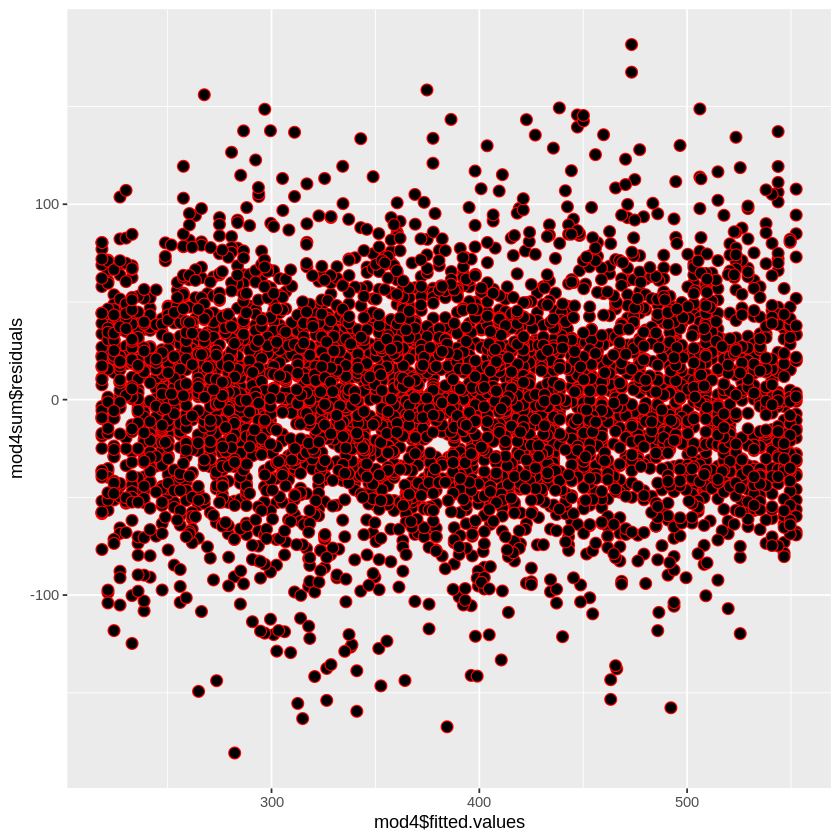

In [21]:
ggplot(mapping = aes(mod4$fitted.values, y = mod4sum$residuals)) + 
  geom_point(shape = 21, colour = "red", fill = "black", size = 3) 
  geom_hline(yintercept = 0, linetype = 3)

# the assumptions are satisfied

Question 20:

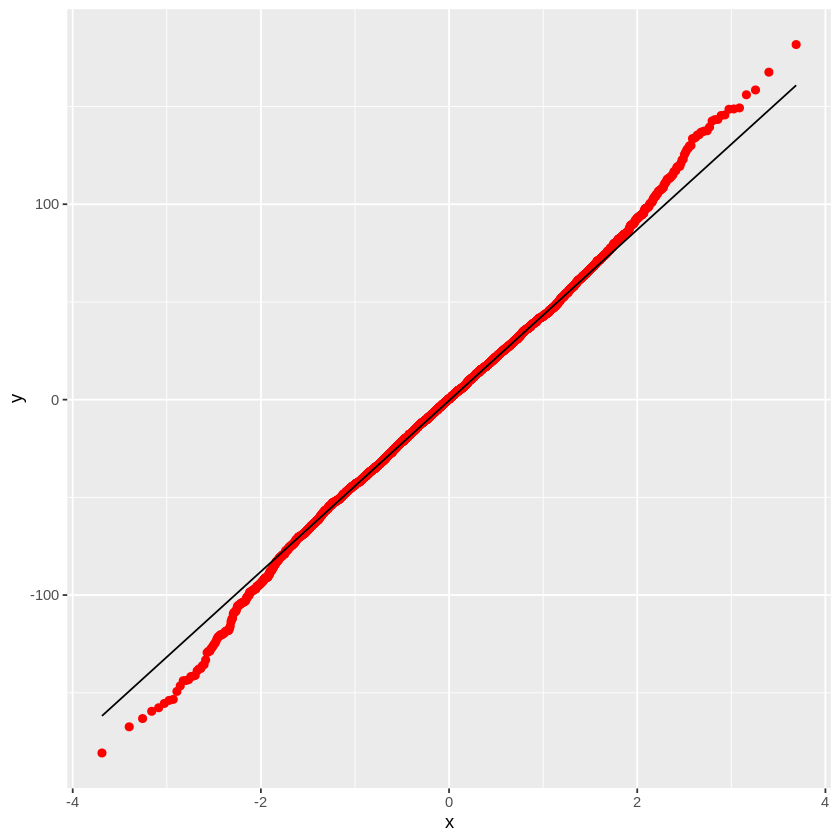

In [22]:
ggplot(mapping = aes(sample = mod4sum$residuals)) + 
  stat_qq(shape = 20, colour = "red", fill = "blue", size = 3)+
    stat_qq_line()

# the assumptions are satisfied

Question 21:

In [38]:
prison = read.csv("prisonBrain.csv")
prison

NonConfined,Confined
<dbl>,<dbl>
10.7,9.6
10.7,10.4
10.4,9.7
10.9,10.3
10.5,9.2
10.3,9.3
9.6,9.9
11.1,9.5
11.2,9.0


In [39]:
install.packages("tidyr")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:
tidyprison = pivot_longer(prison, 1:2, names_to = "Inmate.Group", values_to = "AlphaWave.Patterns", )
tidyprison = tidyprison[order(tidyprison$Inmate.Group, tidyprison$AlphaWave.Patterns), ]
tidyprison

Inmate.Group,AlphaWave.Patterns
<chr>,<dbl>
Confined,9.0
Confined,9.2
Confined,9.3
Confined,9.5
Confined,9.6
Confined,9.7
Confined,9.9
Confined,10.3
Confined,10.4


Inmate.Group,AlphaWave.Patterns
<chr>,<dbl>
Confined,9.0
Confined,9.2
Confined,9.3
Confined,9.5
Confined,9.6
Confined,9.7
Confined,9.9
Confined,10.3
Confined,10.4
